# 함수형 API
- DNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import keras
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import seaborn as sns
from numpy import array
from numpy import hstack
from sklearn.metrics import mean_squared_error, explained_variance_score
from keras.callbacks import EarlyStopping
from matplotlib import font_manager, rc
from keras.models import Model
from keras import layers
from keras import Input
import keras
import math

# 다변량
def split_mult_data(data, timestep, lag):
    x, y = [], []
    for i in range(len(data)):
        end_ix = i + timestep
        out_end_ix = end_ix + lag
        if out_end_ix > len(data):
            break;
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, 0]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

# 단일
def split_data(data, timestep):
    x, y = [], []
    for i in range(len(data)):
        end_ix = i + timestep
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

# 데이터 분할 함수 : 6.2.2
def split(data_x, data_y):
    train_size = int(len(data_x)*0.6)
    val_size = int(len(data_x)*0.8)
    
    data_train_x = data_x[:train_size]
    data_val_x = data_x[train_size:val_size]
    data_test_x = data_x[val_size:]
    
    data_train_y = data_y[:train_size]
    data_val_y = data_y[train_size:val_size]
    data_test_y = data_y[val_size:] 
    
    return data_train_x, data_val_x, data_test_x, data_train_y, data_val_y, data_test_y

# 분할 데이터 정규화
def normalization(data_train, data_val, data_test):
    scaler = MinMaxScaler() #StandardScaler
    scaler.fit(data_train)
    n_data_train = scaler.transform(data_train)
    n_data_val = scaler.transform(data_val)
    n_data_test = scaler.transform(data_test)
    return n_data_train, n_data_val, n_data_test

# 전체 데이터 정규화
def normalization_all(data):
    scaler = MinMaxScaler() #StandardScaler
    scaler.fit(data)
    n_data = scaler.transform(data)
    return n_data

# minmax정규화
def minmax(x):
    n_max = np.max(x)
    n_min = np.min(x)
    sc = (x - n_min) / (n_max - n_min)
    return sc

# 데이터 불러오기

In [3]:
# 코로나 데이터
covid19 = pd.read_csv("covid19.csv",  header=0, squeeze=True)
# covid19 = covid19[{'decide_per_day' : '확진자', 'recovered_per_day' : '완치자', 'death_per_day' : '사망자'}]
covid19 = covid19[{'decide_per_day' : '확진자', 'recovered_per_day' : '완치자'}]
covid19.columns = ['확진자', '완치자']
covid19

,확진자,완치자
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
430,494,562
431,505,845
432,482,420
433,384,269


In [4]:
# 뉴스 데이터 
news = pd.read_csv('사회적거리두기 뉴스.csv')
# news.drop(['Unnamed: 0'], axis='columns', inplace=True)
news

,날짜,뉴스 수
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0
...,...,...
430,2021-03-25,1
431,2021-03-26,17
432,2021-03-27,3
433,2021-03-28,13


In [5]:
# 코로나 관련 검색어
search_covid19 = pd.read_csv("5인이상_검색어.csv")
search_covid19

,날짜,5인이상
0,2020-01-20,0.00000
1,2020-01-21,0.00000
2,2020-01-22,0.00000
3,2020-01-23,0.00000
4,2020-01-24,0.00000
...,...,...
430,2021-03-25,5.46614
431,2021-03-26,7.22695
432,2021-03-27,4.22074
433,2021-03-28,3.72146


In [6]:
# 인구이동 _ 저장한 csv 불러오기
local_people_df = pd.read_csv('seoul_people.csv')
local_people_df.columns = ['날짜', '인구이동']

local_people_df

,날짜,인구이동
0,2020-01-20,263707987
1,2020-01-21,263999557
2,2020-01-22,263092698
3,2020-01-23,255740975
4,2020-01-24,230503552
...,...,...
430,2021-03-25,253723156
431,2021-03-26,253132397
432,2021-03-27,245764635
433,2021-03-28,244437877


# 6:2:2 분할

In [14]:
timestep = 1
lag = 1

news_data = news['뉴스 수'].values

news_x, news_y = split_data(news_data, timestep)

for i in range(40,50):
    print('news_x : ',news_x[i], 'news_y : ', news_y[i])
    
print('뉴스 : ', news_x.shape)

news_train_x, news_val_x, news_test_x, news_train_y, news_val_y, news_test_y = split(news_x, news_y)
print(len(news_train_x), len(news_val_x), len(news_test_x), len(news_train_y), len(news_val_x), len(news_test_y), news_train_x.shape)
#----------------------------------------------------------
search_data = search_covid19['5인이상'].values

search_x, search_y = split_data(search_data, timestep)

for i in range(10):
    print('search_x : ',search_x[i], 'search_y : ', search_y[i])
    
print('네이버 검색어 전 : ', search_x.shape)

### LSTM 경우 ###
# # reshape from [samples, timesteps] into [samples, timesteps, features]
# search_features = 1
# search_x = search_x.reshape((search_x.shape[0], search_x.shape[1], search_features))
# print('네이버 검색어 후 : ', search_x.shape)

search_train_x, search_val_x, search_test_x, search_train_y, search_val_y, search_test_y = split(search_x, search_y)
print(len(search_train_x), len(search_val_x), len(search_test_x), len(search_train_y), len(search_val_x), len(search_test_y), search_train_x.shape)
#-----------------------------------------------------------
covid19_data = covid19.values

covid_x, covid_y = split_mult_data(covid19_data, timestep, lag)

for i in range(424,len(covid_x)):
    print('covid_x : ',covid_x[i], 'covid_y : ', covid_y[i])

print('코로나 : ', covid_x.shape)

covid_train_x, covid_val_x, covid_test_x, covid_train_y, covid_val_y, covid_test_y = split(covid_x, covid_y)
print(len(covid_train_x), len(covid_val_x), len(covid_test_x), len(covid_train_y), len(covid_val_x), len(covid_test_y), covid_train_x.shape)
#--------------------------------------------------------------
people_data = local_people_df['인구이동'].values

people_x, people_y = split_data(people_data, timestep)

for i in range(40,50):
    print('people_x : ',people_x[i], 'people_y : ', people_y[i])
    
print('인구 이동 : ', people_x.shape)

people_train_x, people_val_x, people_test_x, people_train_y, people_val_y, people_test_y = split(people_x, people_y)
print(len(people_train_x), len(people_val_x), len(people_test_x), len(people_train_y), len(people_val_x), len(people_test_y), people_train_x.shape)

news_x :  [5] news_y :  4
news_x :  [4] news_y :  15
news_x :  [15] news_y :  14
news_x :  [14] news_y :  25
news_x :  [25] news_y :  21
news_x :  [21] news_y :  23
news_x :  [23] news_y :  5
news_x :  [5] news_y :  11
news_x :  [11] news_y :  33
news_x :  [33] news_y :  18
뉴스 :  (434, 1)
260 87 87 260 87 87 (260, 1)
search_x :  [0.] search_y :  0.0
search_x :  [0.] search_y :  0.0
search_x :  [0.] search_y :  0.0
search_x :  [0.] search_y :  0.0
search_x :  [0.] search_y :  0.0
search_x :  [0.] search_y :  0.0
search_x :  [0.] search_y :  0.0
search_x :  [0.] search_y :  0.0035
search_x :  [0.0035] search_y :  0.0
search_x :  [0.] search_y :  0.0035
네이버 검색어 전 :  (434, 1)
260 87 87 260 87 87 (260, 1)
covid_x :  [[452 426   3]] covid_y :  [456]
covid_x :  [[456 379   3]] covid_y :  [410]
covid_x :  [[410 283   1]] covid_y :  [346]
covid_x :  [[346 468   7]] covid_y :  [425]
covid_x :  [[425 481   3]] covid_y :  [430]
covid_x :  [[430 508   2]] covid_y :  [494]
covid_x :  [[494 562   7]]

# 정규화

In [7]:
n_covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_train_x.shape[1]*covid_train_x.shape[2])

n_covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_train_x.shape[1]*covid_val_x.shape[2])
n_covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_train_x.shape[1]*covid_test_x.shape[2])

print('정규화를 위해 코로나 데이터 형태 변환 : ', n_covid_train_x.shape)

# 데이터 정규화
covid_train_x, covid_val_x, covid_test_x = normalization(n_covid_train_x, n_covid_val_x, n_covid_test_x)
news_train_x, news_val_x, news_test_x = normalization(news_train_x, news_val_x, news_test_x)
people_train_x, people_val_x, people_test_x = normalization(people_train_x, people_val_x, people_test_x)

print('코로나 데이터 형태 : ' ,covid_train_x.shape)
print('뉴스 데이터 형태 : ' ,news_train_x.shape)
print('검색어 데이터 형태 : ' ,search_train_x.shape)
print('인구 이동 데이터 형태 : ' ,people_train_x.shape)

# ### LSTM ###
# # # 형태 복원(LSTM에 맞게) - 코로나 데이터
# # covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_x.shape[1], covid_x.shape[2])
# # covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_x.shape[1], covid_x.shape[2])
# # covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_x.shape[1], covid_x.shape[2])

# print('코로나 데이터 형태 변환한거 원상복귀 : ', covid_train_x.shape)

# # 형태 변형시켜줌(LSTM에 맞게) - 뉴스 데이터
# news_features = 1
# news_train_x = news_train_x.reshape((news_train_x.shape[0], news_train_x.shape[1], news_features))
# news_val_x = news_val_x.reshape((news_val_x.shape[0], news_val_x.shape[1], news_features))
# news_test_x = news_test_x.reshape((news_test_x.shape[0], news_test_x.shape[1], news_features))

# print('뉴스 데이터 형태 변환 : ' ,news_train_x.shape)

# # 형태 변형시켜줌(LSTM에 맞게) - 인구 데이터
# people_features = 1
# people_train_x = people_train_x.reshape((people_train_x.shape[0], people_train_x.shape[1], people_features))
# people_val_x = people_val_x.reshape((people_val_x.shape[0], people_val_x.shape[1], people_features))
# people_test_x = people_test_x.reshape((people_test_x.shape[0], people_test_x.shape[1], people_features))

# print('인구 데이터 형태 변환 : ', people_train_x.shape)

NameError: name 'covid_train_x' is not defined

# 모델 생성

In [18]:
from keras.models import Model
from keras import layers
from keras import Input
import keras
import tensorflow as tf

tf.random.set_seed(555)

# Input
input_covid = Input(shape=(covid_train_x.shape[1],), dtype='float32') # 코로나
hidden1_covid = layers.Dense(32, activation='relu')(input_covid)
hidden2_covid = layers.Dense(16, activation='relu')(hidden1_covid)
hidden3_covid = layers.Dense(8, activation='relu')(hidden2_covid)

input_news = Input(shape=(news_train_x.shape[1],), dtype='float32')
hidden1_news = layers.Dense(32, activation='relu')(input_news)
hidden2_news = layers.Dense(16, activation='relu')(hidden1_news)
hidden3_news = layers.Dense(8, activation='relu')(hidden2_news)

input_search = Input(shape=(search_train_x.shape[1],), dtype='float32')
hidden1_search = layers.Dense(32, activation='relu')(input_search)
hidden2_search = layers.Dense(16, activation='relu')(hidden1_search)
hidden3_search = layers.Dense(8, activation='relu')(hidden2_search)

input_people = Input(shape=(people_train_x.shape[1],), dtype='float32')
hidden1_people = layers.Dense(32, activation='relu')(input_people)
hidden2_people = layers.Dense(16, activation='relu')(hidden1_people)
hidden3_people = layers.Dense(8, activation='relu')(hidden2_people)

# 연결
concatenated = layers.concatenate([hidden3_covid, hidden3_news, hidden3_search, hidden3_people]) ####
# Output
result = layers.Dense(lag)(concatenated)

model = Model([ input_covid, input_news, input_search, input_people], result) ####
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

callback_list = [
  keras.callbacks.EarlyStopping(
    monitor='val_loss', # 모델의 검증 정확도 모니터링
    patience=20, # 1 에포크보다 더 길게 향상되지 않으면 중단
  )
]
# batch_size : batch_size만큼 보고 가중치를 업데이트 주겠다
# hist = model.fit([covid_train_x, news_train_x, search_train_x, people_train_x], covid_train_y, epochs=1000, batch_size=16, 
#                  callbacks=callback_list, validation_data=([covid_val_x, news_val_x, search_val_x, people_val_x], covid_val_y)) ####

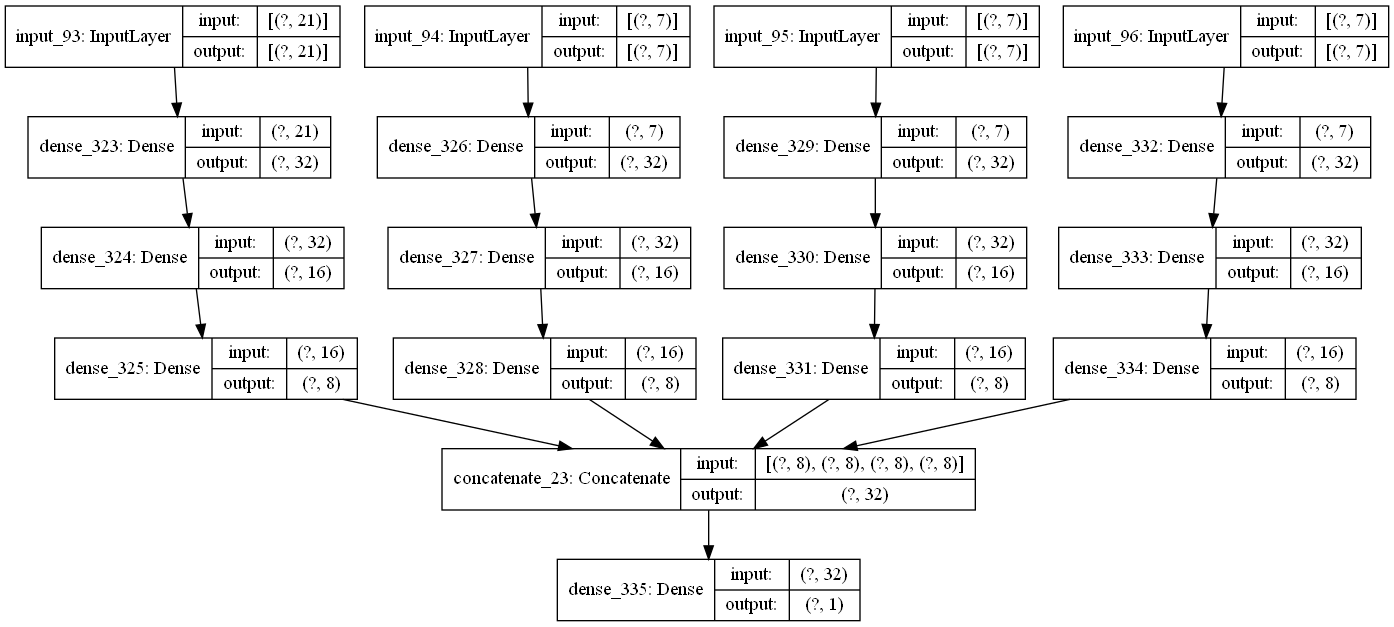

In [46]:
from keras.utils import plot_model
plot_model(model, to_file='model_20210124.png', show_shapes=True)

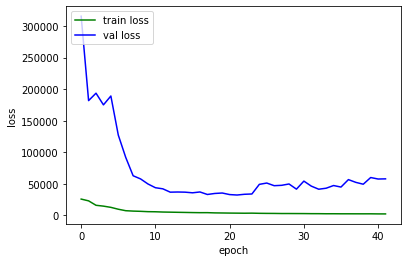

RMSE:  143.42
R-Square:  0.34


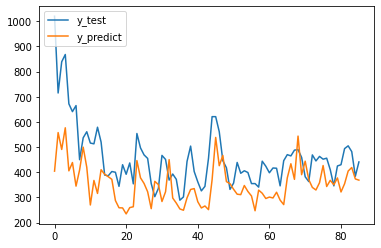

    y_test   y_predict
0     1020  404.418945
1      715  557.652527
2      839  490.656647
3      868  576.721680
4      672  405.695618
..     ...         ...
81     494  354.281586
82     505  404.876770
83     482  418.850037
84     384  373.512360
85     441  368.731232

[86 rows x 2 columns]


In [24]:
# 학습 시각화 함수
def learning_graph(hist):
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'],'g', label='train loss')
    loss_ax.plot(hist.history['val_loss'],'b', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    plt.show()
    
learning_graph(hist)

# 실제값, 예측값 그래프
y_predict = model.predict([covid_test_x, news_test_x, search_test_x, people_test_x]) ####

# 에러율 - Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_predict, covid_test_y))
print('RMSE: ',rmse.round(2))

r = explained_variance_score(covid_test_y, y_predict)
print('R-Square: ',r.round(2))

fig, loss_ax = plt.subplots()
loss_ax.plot(covid_test_y, label='y_test')
loss_ax.plot(y_predict, label='y_predict')
loss_ax.legend(loc='upper left')
plt.show()

df = pd.DataFrame(covid_test_y)
df.insert(1,'y_predict',y_predict)
df.rename(columns={0:'y_test'}, inplace=True)
print(df)

# 반복문으로 묶어서 time_step 1 ~ 7 까지 반복

In [20]:
lag = 1
news_data = news['뉴스 수'].values
search_data = search_covid19['5인이상'].values
covid19_data = covid19.values
people_data = local_people_df['인구이동'].values
rmse =[]
r2 = []

for timestep in range(1, 8, 1): 
    news_x, news_y = split_data(news_data, timestep)

    news_train_x, news_val_x, news_test_x, news_train_y, news_val_y, news_test_y = split(news_x, news_y)
    #----------------------------------------------------------
    search_x, search_y = split_data(search_data, timestep)
    ### LSTM 경우 ###
    # # reshape from [samples, timesteps] into [samples, timesteps, features]
    # search_features = 1
    # search_x = search_x.reshape((search_x.shape[0], search_x.shape[1], search_features))
    # print('네이버 검색어 후 : ', search_x.shape)
    search_train_x, search_val_x, search_test_x, search_train_y, search_val_y, search_test_y = split(search_x, search_y)
    #-----------------------------------------------------------
    covid_x, covid_y = split_mult_data(covid19_data, timestep, lag)

    covid_train_x, covid_val_x, covid_test_x, covid_train_y, covid_val_y, covid_test_y = split(covid_x, covid_y)
    #--------------------------------------------------------------
    people_x, people_y = split_data(people_data, timestep)

    people_train_x, people_val_x, people_test_x, people_train_y, people_val_y, people_test_y = split(people_x, people_y)
    
    # 정규화
    n_covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_train_x.shape[1]*covid_train_x.shape[2])

    n_covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_train_x.shape[1]*covid_val_x.shape[2])
    n_covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_train_x.shape[1]*covid_test_x.shape[2])

    # 데이터 정규화
    covid_train_x, covid_val_x, covid_test_x = normalization(n_covid_train_x, n_covid_val_x, n_covid_test_x)
    news_train_x, news_val_x, news_test_x = normalization(news_train_x, news_val_x, news_test_x)
    people_train_x, people_val_x, people_test_x = normalization(people_train_x, people_val_x, people_test_x)

    print('코로나 데이터 형태 : ' ,covid_train_x.shape)
    print('뉴스 데이터 형태 : ' ,news_train_x.shape)
    print('검색어 데이터 형태 : ' ,search_train_x.shape)
    print('인구 이동 데이터 형태 : ' ,people_train_x.shape)
    
    tf.random.set_seed(555)

    # Input
    input_covid = Input(shape=(covid_train_x.shape[1],), dtype='float32') # 코로나
    hidden1_covid = layers.Dense(32, activation='relu')(input_covid)
    hidden2_covid = layers.Dense(16, activation='relu')(hidden1_covid)
    hidden3_covid = layers.Dense(8, activation='relu')(hidden2_covid)

    input_news = Input(shape=(news_train_x.shape[1],), dtype='float32')
    hidden1_news = layers.Dense(32, activation='relu')(input_news)
    hidden2_news = layers.Dense(16, activation='relu')(hidden1_news)
    hidden3_news = layers.Dense(8, activation='relu')(hidden2_news)

    input_search = Input(shape=(search_train_x.shape[1],), dtype='float32')
    hidden1_search = layers.Dense(32, activation='relu')(input_search)
    hidden2_search = layers.Dense(16, activation='relu')(hidden1_search)
    hidden3_search = layers.Dense(8, activation='relu')(hidden2_search)

    input_people = Input(shape=(people_train_x.shape[1],), dtype='float32')
    hidden1_people = layers.Dense(32, activation='relu')(input_people)
    hidden2_people = layers.Dense(16, activation='relu')(hidden1_people)
    hidden3_people = layers.Dense(8, activation='relu')(hidden2_people)

    # 연결
    concatenated = layers.concatenate([hidden3_covid, hidden3_news, hidden3_search, hidden3_people]) ####
    # Output
    result = layers.Dense(lag)(concatenated)

    model = Model([ input_covid, input_news, input_search, input_people], result) ####
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    callback_list = [
      keras.callbacks.EarlyStopping(
        monitor='val_loss', # 모델의 검증 정확도 모니터링
        patience=20, # 1 에포크보다 더 길게 향상되지 않으면 중단
      )
    ]
    # batch_size : batch_size만큼 보고 가중치를 업데이트 주겠다
    hist = model.fit([covid_train_x, news_train_x, search_train_x, people_train_x], covid_train_y, epochs=1000, batch_size=5, 
                     callbacks=callback_list, validation_data=([covid_val_x, news_val_x, search_val_x, people_val_x], covid_val_y)) ####
    
    y_predict = model.predict([covid_test_x, news_test_x, search_test_x, people_test_x]) ####
    
    # 에러율 - Root Mean Squared Error
    Rmse = round(math.sqrt(mean_squared_error(y_predict, covid_test_y)), 2)
    R2 = round(explained_variance_score(covid_test_y, y_predict), 2)

    rmse.append(Rmse)
    r2.append(R2)

코로나 데이터 형태 :  (260, 2)
뉴스 데이터 형태 :  (260, 1)
검색어 데이터 형태 :  (260, 1)
인구 이동 데이터 형태 :  (260, 1)
Epoch 1/1000
52/52 [==============================] - 0s 5ms/step - loss: 25434.0488 - mae: 93.2421 - val_loss: 325382.8125 - val_mae: 436.7223
Epoch 2/1000
52/52 [==============================] - 0s 3ms/step - loss: 25097.7305 - mae: 91.8021 - val_loss: 318478.9062 - val_mae: 431.6669
Epoch 3/1000
52/52 [==============================] - 0s 3ms/step - loss: 24160.1660 - mae: 87.6990 - val_loss: 300720.9375 - val_mae: 417.5848
Epoch 4/1000
52/52 [==============================] - 0s 3ms/step - loss: 21759.5723 - mae: 79.2438 - val_loss: 264861.0000 - val_mae: 385.8884
Epoch 5/1000
52/52 [==============================] - 0s 3ms/step - loss: 18113.7480 - mae: 69.9863 - val_loss: 217370.8750 - val_mae: 337.8474
Epoch 6/1000
52/52 [==============================] - 0s 3ms/step - loss: 15926.9639 - mae: 73.1302 - val_loss: 186712.9375 - val_mae: 306.3979
Epoch 7/1000
52/52 [=======================

52/52 [==============================] - 0s 3ms/step - loss: 2793.0811 - mae: 27.8746 - val_loss: 11423.7285 - val_mae: 72.2768
Epoch 58/1000
52/52 [==============================] - 0s 3ms/step - loss: 2832.7668 - mae: 27.6877 - val_loss: 10690.6279 - val_mae: 69.9859
Epoch 59/1000
52/52 [==============================] - 0s 3ms/step - loss: 2792.8374 - mae: 27.8731 - val_loss: 11218.9561 - val_mae: 71.3362
Epoch 60/1000
52/52 [==============================] - 0s 3ms/step - loss: 2846.6646 - mae: 27.0926 - val_loss: 11550.6641 - val_mae: 72.2977
Epoch 61/1000
52/52 [==============================] - 0s 3ms/step - loss: 2800.5024 - mae: 27.5645 - val_loss: 11162.4580 - val_mae: 71.1639
Epoch 62/1000
52/52 [==============================] - 0s 3ms/step - loss: 2858.3550 - mae: 28.5280 - val_loss: 12208.4473 - val_mae: 74.4306
Epoch 63/1000
52/52 [==============================] - 0s 3ms/step - loss: 2827.8147 - mae: 27.4838 - val_loss: 11487.5830 - val_mae: 72.0285
Epoch 64/1000
52/52 

52/52 [==============================] - 0s 3ms/step - loss: 2849.3159 - mae: 27.8760 - val_loss: 12257.9824 - val_mae: 77.6695
Epoch 38/1000
52/52 [==============================] - 0s 3ms/step - loss: 2845.4146 - mae: 27.8039 - val_loss: 11965.2676 - val_mae: 77.0788
Epoch 39/1000
52/52 [==============================] - 0s 3ms/step - loss: 2869.8110 - mae: 27.9580 - val_loss: 11508.6865 - val_mae: 75.8404
Epoch 40/1000
52/52 [==============================] - 0s 3ms/step - loss: 2838.3645 - mae: 28.1612 - val_loss: 11587.6943 - val_mae: 76.6602
Epoch 41/1000
52/52 [==============================] - 0s 3ms/step - loss: 2849.7815 - mae: 27.8493 - val_loss: 12712.9355 - val_mae: 80.0247
Epoch 42/1000
52/52 [==============================] - 0s 3ms/step - loss: 2831.7383 - mae: 27.4763 - val_loss: 12358.8174 - val_mae: 78.8278
Epoch 43/1000
52/52 [==============================] - 0s 3ms/step - loss: 2854.9905 - mae: 28.1036 - val_loss: 12075.6182 - val_mae: 77.9286
Epoch 44/1000
52/52 

52/52 [==============================] - 0s 3ms/step - loss: 3082.7627 - mae: 29.0140 - val_loss: 14999.2910 - val_mae: 85.3235
Epoch 30/1000
52/52 [==============================] - 0s 3ms/step - loss: 3060.7610 - mae: 28.7446 - val_loss: 14348.4736 - val_mae: 83.5461
Epoch 31/1000
52/52 [==============================] - 0s 3ms/step - loss: 3082.3721 - mae: 28.3909 - val_loss: 14337.1885 - val_mae: 83.6881
Epoch 32/1000
52/52 [==============================] - 0s 3ms/step - loss: 3063.0669 - mae: 29.2508 - val_loss: 15183.0205 - val_mae: 86.1435
Epoch 33/1000
52/52 [==============================] - 0s 3ms/step - loss: 3089.6428 - mae: 28.2320 - val_loss: 18055.7266 - val_mae: 94.1938
Epoch 34/1000
52/52 [==============================] - 0s 3ms/step - loss: 3047.5906 - mae: 28.3653 - val_loss: 13991.8994 - val_mae: 82.3987
Epoch 35/1000
52/52 [==============================] - 0s 3ms/step - loss: 3069.5918 - mae: 28.0362 - val_loss: 16711.2891 - val_mae: 90.1638
Epoch 36/1000
52/52 

52/52 [==============================] - 0s 3ms/step - loss: 3611.0220 - mae: 30.5448 - val_loss: 21175.9062 - val_mae: 98.3368
Epoch 27/1000
52/52 [==============================] - 0s 3ms/step - loss: 3552.7039 - mae: 30.9682 - val_loss: 20764.1113 - val_mae: 100.1248
Epoch 28/1000
52/52 [==============================] - 0s 3ms/step - loss: 3528.3608 - mae: 29.9922 - val_loss: 19912.4395 - val_mae: 97.0673
Epoch 29/1000
52/52 [==============================] - 0s 3ms/step - loss: 3483.9060 - mae: 30.4946 - val_loss: 19380.6562 - val_mae: 96.2146
Epoch 30/1000
52/52 [==============================] - 0s 3ms/step - loss: 3503.6072 - mae: 30.0140 - val_loss: 19280.3125 - val_mae: 96.8998
Epoch 31/1000
52/52 [==============================] - 0s 3ms/step - loss: 3454.4458 - mae: 30.0765 - val_loss: 19152.9238 - val_mae: 97.2425
Epoch 32/1000
52/52 [==============================] - 0s 3ms/step - loss: 3442.1545 - mae: 29.1500 - val_loss: 19077.1523 - val_mae: 96.7943
Epoch 33/1000
52/52

52/52 [==============================] - 0s 3ms/step - loss: 3973.4312 - mae: 32.2980 - val_loss: 17990.0742 - val_mae: 93.6445
Epoch 26/1000
52/52 [==============================] - 0s 3ms/step - loss: 3896.7654 - mae: 32.4838 - val_loss: 16221.3301 - val_mae: 88.5319
Epoch 27/1000
52/52 [==============================] - 0s 3ms/step - loss: 3848.5071 - mae: 32.2760 - val_loss: 18764.8457 - val_mae: 94.6392
Epoch 28/1000
52/52 [==============================] - 0s 3ms/step - loss: 3829.3325 - mae: 31.3705 - val_loss: 18950.7324 - val_mae: 95.1641
Epoch 29/1000
52/52 [==============================] - 0s 3ms/step - loss: 3816.7476 - mae: 32.2022 - val_loss: 16385.4629 - val_mae: 88.2496
Epoch 30/1000
52/52 [==============================] - 0s 3ms/step - loss: 3774.0549 - mae: 31.4184 - val_loss: 20162.8652 - val_mae: 97.3363
Epoch 31/1000
52/52 [==============================] - 0s 3ms/step - loss: 3744.6792 - mae: 31.4077 - val_loss: 22286.1289 - val_mae: 102.7984
Epoch 32/1000
52/52

52/52 [==============================] - 0s 3ms/step - loss: 3981.2727 - mae: 31.7832 - val_loss: 18680.2480 - val_mae: 94.5197
Epoch 31/1000
52/52 [==============================] - 0s 3ms/step - loss: 3926.0850 - mae: 32.7337 - val_loss: 21582.5879 - val_mae: 100.7358
Epoch 32/1000
52/52 [==============================] - 0s 3ms/step - loss: 3839.3330 - mae: 31.5000 - val_loss: 19290.8086 - val_mae: 95.3269
Epoch 33/1000
52/52 [==============================] - 0s 3ms/step - loss: 3835.8225 - mae: 32.4924 - val_loss: 22131.8438 - val_mae: 102.0609
Epoch 34/1000
52/52 [==============================] - 0s 3ms/step - loss: 3760.9336 - mae: 30.7604 - val_loss: 22201.7500 - val_mae: 101.9343
Epoch 35/1000
52/52 [==============================] - 0s 3ms/step - loss: 3663.9150 - mae: 30.5222 - val_loss: 20673.2793 - val_mae: 98.7164
Epoch 36/1000
52/52 [==============================] - 0s 3ms/step - loss: 3635.0310 - mae: 30.6406 - val_loss: 23121.5469 - val_mae: 104.7321
Epoch 37/1000
52

52/52 [==============================] - 0s 3ms/step - loss: 4351.6973 - mae: 35.4419 - val_loss: 27900.2363 - val_mae: 117.0757
Epoch 32/1000
52/52 [==============================] - 0s 3ms/step - loss: 4191.5552 - mae: 33.0157 - val_loss: 26316.9336 - val_mae: 113.9735
Epoch 33/1000
52/52 [==============================] - 0s 3ms/step - loss: 4174.6401 - mae: 32.8667 - val_loss: 25067.8164 - val_mae: 111.2884
Epoch 34/1000
52/52 [==============================] - 0s 3ms/step - loss: 4062.8511 - mae: 32.5934 - val_loss: 25434.9648 - val_mae: 112.5202
Epoch 35/1000
52/52 [==============================] - 0s 3ms/step - loss: 4015.5940 - mae: 32.6140 - val_loss: 26113.5410 - val_mae: 114.3845
Epoch 36/1000
52/52 [==============================] - 0s 3ms/step - loss: 3968.9958 - mae: 32.1058 - val_loss: 26564.7559 - val_mae: 115.6443
Epoch 37/1000
52/52 [==============================] - 0s 3ms/step - loss: 3951.9854 - mae: 32.5370 - val_loss: 27067.8379 - val_mae: 117.0187
Epoch 38/1000

In [21]:
rmse

[99.75, 100.54, 107.56, 83.75, 101.98, 93.74, 82.28]

In [22]:
r2

[0.56, 0.61, 0.64, 0.63, 0.64, 0.65, 0.61]

Text(0, 0.5, 'RMSE')

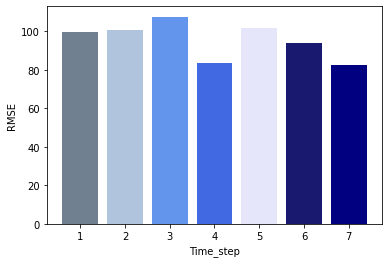

In [23]:
colors = ['slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'lavender', 'midnightblue','navy']

plt.bar([1,2,3,4,5,6,7],rmse, color = colors)
plt.xlabel("Time_step")
plt.ylabel("RMSE")

Text(0, 0.5, 'R2')

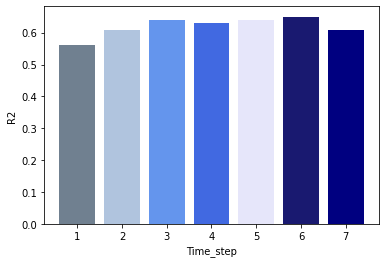

In [24]:
plt.bar([1,2,3,4,5,6,7],r2, color = colors)
plt.xlabel("Time_step")
plt.ylabel("R2")